In [19]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [20]:
# Constants (in CGS units)
c = 2.99792458e10  # speed of light in cm/s
G = 6.6743015e-8   # gravitational constant in cm^3 g^-1 s^-2
M_sun = 1.98892e33  # mass of the Sun in grams

# Masses of the binary components
m1 = m2 = 30 * M_sun  # masses of both objects in grams

# Initial conditions
a0 = 1.49598073e12  # semi-major axis in cm (approximately 1 AU)
e0 = 0.7            # initial eccentricity

# Time settings
years_to_seconds = 3.154e7  # seconds in one year
t_final = 1e8 * years_to_seconds  # 10^8 years in seconds
num_steps = 100000  # number of integration steps
t = np.linspace(0, t_final, num_steps)  # time array

In [21]:
# Function to calculate the derivatives of a and e
def binary_system(y, t, m1, m2, G, c):
    a, e = y  # Unpack the current values of a and e
    
    # da/dt equation
    da_dt = (-64 / 5) * (G**3 * m1 * m2 * (m1 + m2)) / (c**5 * a**3 * (1 - e**2)**(7 / 2)) * (1 + 73/24 * e**2 + 37/96 * e**4)
    
    # de/dt equation
    de_dt = (-304 / 15) * e * (G**3 * m1 * m2 * (m1 + m2)) / (c**5 * a**3 * (1 - e**2)**(5 / 2)) * (1 + 121/304 * e**2)
    
    return [da_dt, de_dt]   

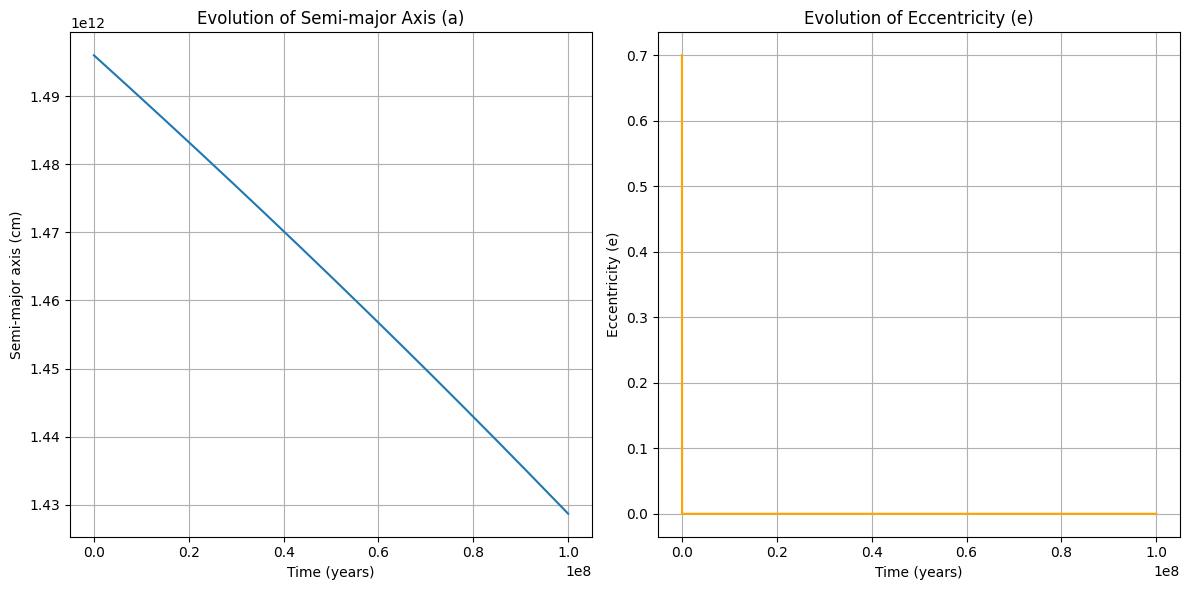

In [22]:
# Initial values
y0 = [a0, e0]

# Integrate the system using odeint
sol = odeint(binary_system, y0, t, args=(m1, m2, G, c))

# Extract the results for a and e
a_values = sol[:, 0]
e_values = sol[:, 1]

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot semi-major axis over time
plt.subplot(1, 2, 1)
plt.plot(t / years_to_seconds, a_values, label='a(t)')
plt.xlabel('Time (years)')
plt.ylabel('Semi-major axis (cm)')
plt.title('Evolution of Semi-major Axis (a)')
plt.grid(True)

# Plot eccentricity over time
plt.subplot(1, 2, 2)
plt.plot(t / years_to_seconds, e_values, label='e(t)', color='orange')
plt.xlabel('Time (years)')
plt.ylabel('Eccentricity (e)')
plt.title('Evolution of Eccentricity (e)')
plt.grid(True)

plt.tight_layout()
plt.show()
